In [207]:
pip install selfies


In [208]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [209]:
from rdkit import Chem
from rdkit.Chem import Draw
import selfies as sf
import numpy as np

In [210]:
## smiles string of the chemical molecules 
## these molecules are all derivates of benzene

input_smiles_list = ['Cc1ccccc1','c1ccc(cc1)O', 'c1ccc(cc1)N', 'C1=CC=C(C=C1)[N+](=O)[O-]', 'C(=O)(O)C1=CC=CC=C1',\
                    'C1=CC=C(C=O)C=C1', 'C=CC1=CC=CC=C1', 'CC(=O)C1=CC=CC=C1', 'CC(C)C1=CC=CC=C1', 'c1ccc2ccccc2c1',\
                    'c1ccc(cc1)c2ccccc2', 'Cc1ccccc1', 'C1=CC=C2C=C3C=CC=CC3=CC2=C1','c1ccccc1N', 'O=C(O)c1ccccc1C(O)=O',\
                    'O=C(O)c1ccc(O)cc1', 'C1=CC(=C(C=C1)O)O', 'Oc1ccc(O)cc1', 'Oc1ccc(O)cc1','C1=CC=CC=C1C(=O)OC(=O)C']

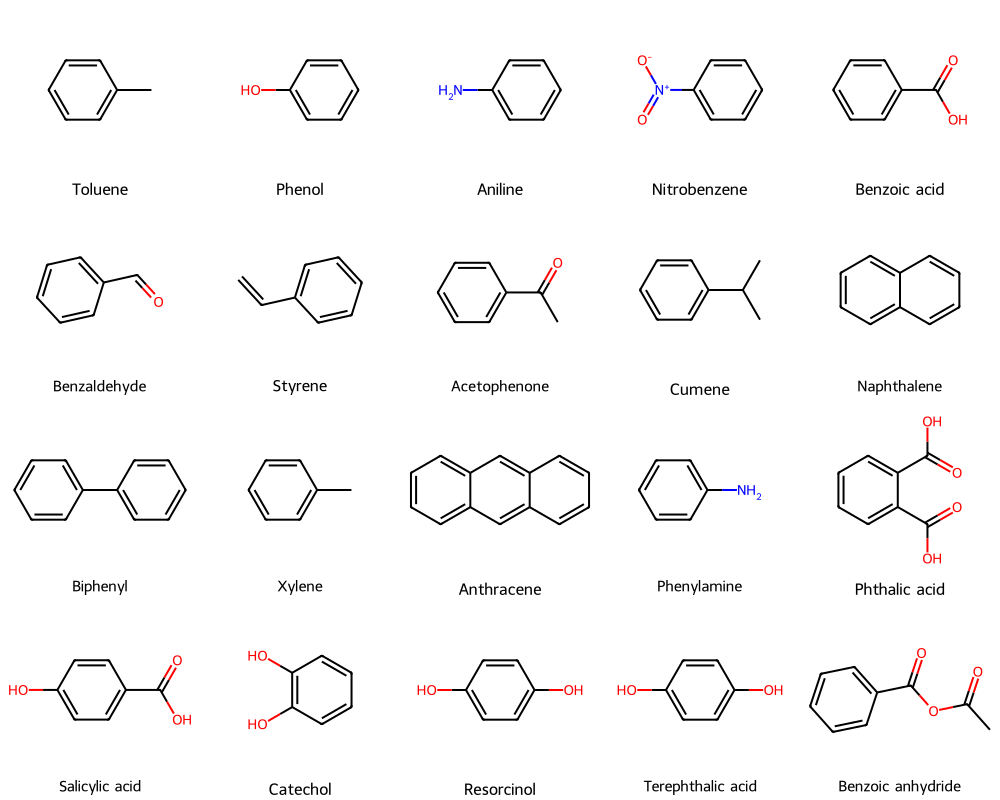

In [211]:
## Visualizing the molecules using RDkit

molecule_names =  ['Toluene','Phenol','Aniline','Nitrobenzene','Benzoic acid','Benzaldehyde','Styrene','Acetophenone','Cumene',\
          'Naphthalene','Biphenyl','Xylene','Anthracene','Phenylamine','Phthalic acid','Salicylic acid','Catechol',\
          'Resorcinol','Terephthalic acid','Benzoic anhydride']
input_mol_list = []
for smiles in input_smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    input_mol_list.append(mol)
img = Draw.MolsToGridImage(input_mol_list, molsPerRow=5, legends = [str(x) for x in molecule_names])
img

In [212]:
## Convert the smiles strings to selfies 

input_selfies_list = list(map(sf.encoder, input_smiles_list))
input_selfies_list

['[C][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][O]',
 '[C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][N]',
 '[C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][N+1][=Branch1][C][=O][O-1]',
 '[C][=Branch1][C][=O][Branch1][C][O][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][=C][C][=C][Branch1][Ring1][C][=O][C][=C][Ring1][Branch2]',
 '[C][=C][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][C][=Branch1][C][=O][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][C][Branch1][C][C][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][=C][C][=C][C][=C][C][=C][C][Ring1][=Branch1][=C][Ring1][#Branch2]',
 '[C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][=C][C][=C][C][=C][C][=C][C][=C][C][Ring1][=Branch1][=C][C][Ring1][#Branch2][=C][Ring1][=C]',
 '[C][=C][C][=C][C][=C][Ring1][=Branch1][N]',
 '[O][=C][Branch1][C][O][C][=C][C][=C][C][=C][Ring1

In [213]:
## Find out the maximum length in the list

max_len = max(sf.len_selfies(s) for s in input_selfies_list)
max_len

20

In [214]:
## Identify the unique SELFIES symbols (alphabets)
alphabet = sf.get_alphabet_from_selfies(input_selfies_list)

## add [nop] to the symbols (alphabet)
alphabet.add("[nop]")

## convert the tuple to list and sort
alphabet= list(sorted(alphabet))
alphabet

['[#Branch1]',
 '[#Branch2]',
 '[=Branch1]',
 '[=Branch2]',
 '[=C]',
 '[=O]',
 '[Branch1]',
 '[Branch2]',
 '[C]',
 '[N+1]',
 '[N]',
 '[O-1]',
 '[O]',
 '[Ring1]',
 '[nop]']

In [215]:
### Map the SELFIES symbols to indices

vocab_stoi = {symbol: idx for idx, symbol in enumerate(alphabet)}
vocab_stoi

{'[#Branch1]': 0,
 '[#Branch2]': 1,
 '[=Branch1]': 2,
 '[=Branch2]': 3,
 '[=C]': 4,
 '[=O]': 5,
 '[Branch1]': 6,
 '[Branch2]': 7,
 '[C]': 8,
 '[N+1]': 9,
 '[N]': 10,
 '[O-1]': 11,
 '[O]': 12,
 '[Ring1]': 13,
 '[nop]': 14}

In [216]:
vocab_itos = {idx: symbol for symbol, idx in vocab_stoi.items()}
vocab_itos

{0: '[#Branch1]',
 1: '[#Branch2]',
 2: '[=Branch1]',
 3: '[=Branch2]',
 4: '[=C]',
 5: '[=O]',
 6: '[Branch1]',
 7: '[Branch2]',
 8: '[C]',
 9: '[N+1]',
 10: '[N]',
 11: '[O-1]',
 12: '[O]',
 13: '[Ring1]',
 14: '[nop]'}

In [217]:
## Use one-hot encoding to encode the SELFIES indices

label, one_hot = sf.selfies_to_encoding(input_selfies_list[0], vocab_stoi, pad_to_len=max_len)
input_one_hot_arr = np.expand_dims(np.array(one_hot), axis=0)


for i in range (1,len(input_selfies_list)):
    label, one_hot = sf.selfies_to_encoding(input_selfies_list[i], vocab_stoi, pad_to_len=max_len)
    one_hot_arr = np.expand_dims(np.array(one_hot), axis=0)
    input_one_hot_arr = np.vstack((input_one_hot_arr,one_hot_arr))
    
input_one_hot_arr

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       ...,

       [[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [218]:
## The input_one_hot_arr is the encoded dataset to be trained
## It contains 20 molecules, each represented in a 2D array of size 20 x 15. 

train_dataset = input_one_hot_arr


train_dataset.shape

(20, 20, 15)

In [219]:
train_dataset[0].shape

(20, 15)

In [220]:
train_dataset[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0,

In [221]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [222]:
# Reshape X_train to 2D array
input_dim = train_dataset.shape[1] * train_dataset.shape[2]
X_train = train_dataset.reshape(-1, input_dim)

# Define the dimensions of the latent space
latent_dim = 2  # You can adjust this according to your needs

In [223]:
# Define the encoder model
encoder_inputs = keras.Input(shape=(input_dim,))
x = layers.Dense(64, activation="relu")(encoder_inputs)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [224]:
# Define the sampling layer to sample from the distribution defined by z_mean and z_log_var
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim), mean=0.0, stddev=1.0)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

In [225]:
# Define the decoder model

decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation="relu")(decoder_inputs)
x = layers.Dense(128, activation="relu")(x)
decoder_outputs = layers.Dense(input_dim, activation="sigmoid")(x)

#decoder_outputs = layers.Dense(input_dim, activation="sigmoid")(x)
input_dim

300

In [226]:
# Define the VAE model
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")

vae_outputs = decoder(encoder(encoder_inputs)[2])
vae = keras.Model(encoder_inputs, vae_outputs, name="vae")

In [227]:
# Define the VAE loss function
reconstruction_loss = keras.losses.binary_crossentropy(encoder_inputs, vae_outputs)
reconstruction_loss *= input_dim
kl_loss = 1 + z_log_var - keras.backend.square(z_mean) - keras.backend.exp(z_log_var)
kl_loss = keras.backend.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = keras.backend.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

In [228]:
# Compile the VAE model
vae.compile(optimizer="adam")

In [229]:
# Train the VAE model
vae.fit(X_train, epochs=500, batch_size=256, verbose=0)

In [230]:
# Generate decoded data
X_decoded = vae.predict(X_train)
len(X_decoded)

1/1 [==============================] - 0s 106ms/step


20

In [231]:
# Reshape X_decoded back to 3D array
X_decoded = X_decoded.reshape(train_dataset.shape)

In [232]:
X_decoded.shape
X_decoded[8]
len(X_decoded)

20

In [233]:
max_values = np.max(X_decoded, axis=2, keepdims=True)
decoded_data = np.where(X_decoded == max_values, 1, 0)
decoded_data[4]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0,

In [234]:
### Reproduce SMILES list and visualize the output images 

output_smiles_list = []
for i in range (0,len(decoded_data)):
    sm = sf.decoder(sf.encoding_to_selfies(decoded_data[i].tolist(), vocab_itos, enc_type="one_hot"))
    output_smiles_list.append(sm)
    
output_smiles_list

['CC1=CC=CC=C1',
 'C1=CC=C(C=C1)N',
 'C1=CC=C(C=C1)N',
 'C1=CC=C(C=C1)[N+1]=CC=O',
 'O=C(C)C1=CC=CC=C1C',
 'C=CC#CC=O',
 'C1=CC=C(C=C1)N',
 'CC(O)C1=CC=CC=C1',
 'CC(O)C1=CC=CC=C1',
 'C1=CC=C(C=C1)[N+1]=CC=O',
 'C1=CC=C(C=C1)C2=CC=CC=C2',
 'CC1=CC=CC=C1',
 'C1=CC=C2C=C3C=CC=CC3=CC2=C1',
 'CCCC=C(O)C#C',
 'O=C(O)C1=CC=CC=C1C(O)=O',
 'O=C(O)C1=CC=CCC1C(O)=O',
 'C=CC=CC=CC=C',
 'CC1=CC=C(O)C=C1',
 'OC1=CC=C(O)C=C1',
 'C=CC=C1C=C2C=CC=CC2=CC1=C']

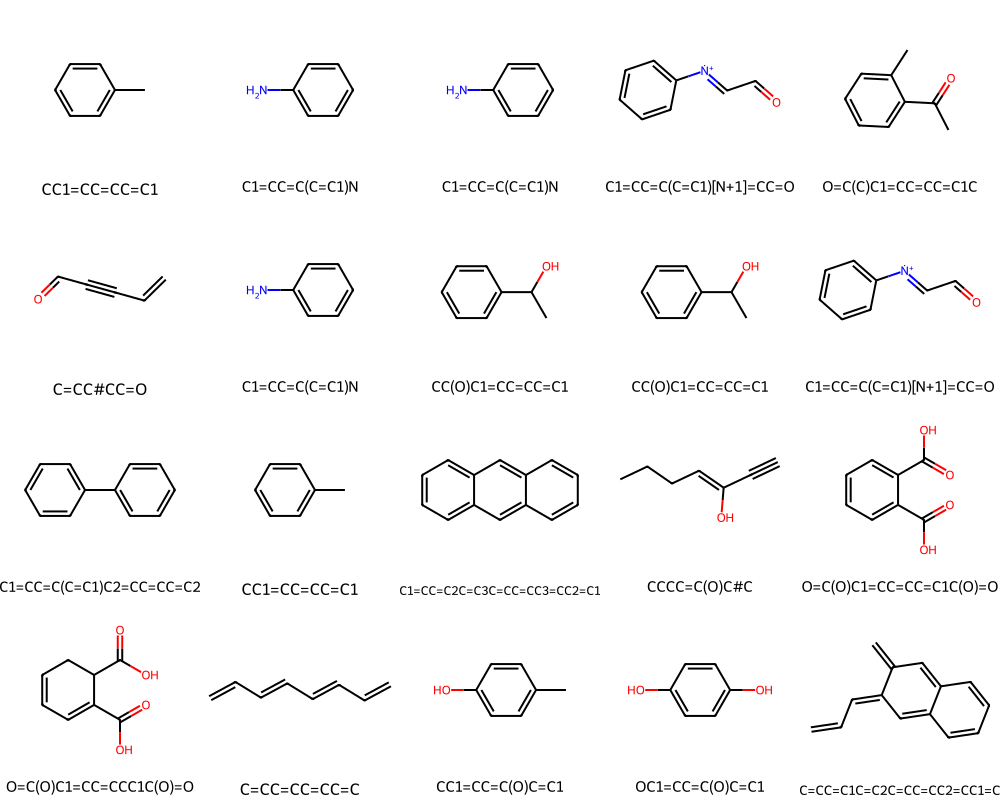

In [235]:
output_mol_list = []
for smiles in output_smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    output_mol_list.append(mol)
img = Draw.MolsToGridImage(output_mol_list, molsPerRow=5, legends = [str(x) for x in output_smiles_list])
img